In [37]:
import pandas as pd
import numpy as np

import seaborn as sns
# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [38]:
water_df = pd.read_csv('water_potability.csv')

In [39]:
water_df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [40]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [41]:
water_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ph,2785.0,7.080795,1.594320,0.000000,6.093092,7.036752,8.062066,14.000000
Hardness,3276.0,196.369496,32.879761,47.432000,176.850538,196.967627,216.667456,323.124000
Solids,3276.0,22014.092526,8768.570828,320.942611,15666.690297,20927.833607,27332.762127,61227.196008
Chloramines,3276.0,7.122277,1.583085,0.352000,6.127421,7.130299,8.114887,13.127000
Sulfate,2495.0,333.775777,41.416840,129.000000,307.699498,333.073546,359.950170,481.030642
Conductivity,3276.0,426.205111,80.824064,181.483754,365.734414,421.884968,481.792304,753.342620
Organic_carbon,3276.0,14.284970,3.308162,2.200000,12.065801,14.218338,16.557652,28.300000
Trihalomethanes,3114.0,66.396293,16.175008,0.738000,55.844536,66.622485,77.337473,124.000000
Turbidity,3276.0,3.966786,0.780382,1.450000,3.439711,3.955028,4.500320,6.739000
Potability,3276.0,0.390110,0.487849,0.000000,0.000000,0.000000,1.000000,1.000000


In [42]:
for column_name in water_df.columns:
    unique_values = len(water_df[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'ph' has '2786' unique values
Feature 'Hardness' has '3276' unique values
Feature 'Solids' has '3276' unique values
Feature 'Chloramines' has '3276' unique values
Feature 'Sulfate' has '2496' unique values
Feature 'Conductivity' has '3276' unique values
Feature 'Organic_carbon' has '3276' unique values
Feature 'Trihalomethanes' has '3115' unique values
Feature 'Turbidity' has '3276' unique values
Feature 'Potability' has '2' unique values


In [43]:
duplicate_status = water_df.duplicated()
duplicate_status.sum()

0

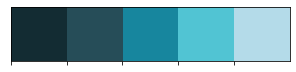

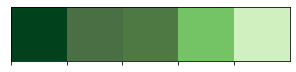

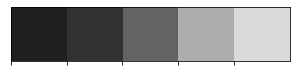

In [44]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
sns.palplot(colors_blue)
sns.palplot(colors_green)
sns.palplot(colors_dark)

<AxesSubplot:>

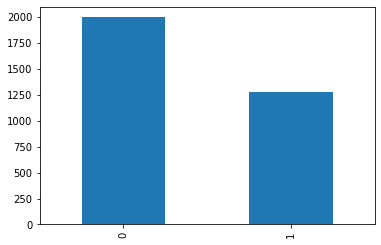

In [45]:
water_df['Potability'].value_counts().plot(kind='bar')

In [46]:
d= pd.DataFrame(water_df['Potability'].value_counts())
fig = px.pie(d,values='Potability',names=['Not Potable','Potable'],hole=0.4,opacity=0.6,
            color_discrete_sequence=[colors_green[3],colors_blue[3]],
             labels={'label':'Potability','Potability':'No. Of Samples'})

fig.add_annotation(text='Need to resample the data<br> to get a balanced dataset<br> or use diffrent weight for each class',
                   x=1.2,y=0.9,showarrow=False,font_size=12,opacity=0.7,font_family='monospace')
fig.add_annotation(text='Potability',
                   x=0.5,y=0.5,showarrow=False,font_size=14,opacity=0.7,font_family='monospace')

fig.update_layout(
    font_family='monospace',
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

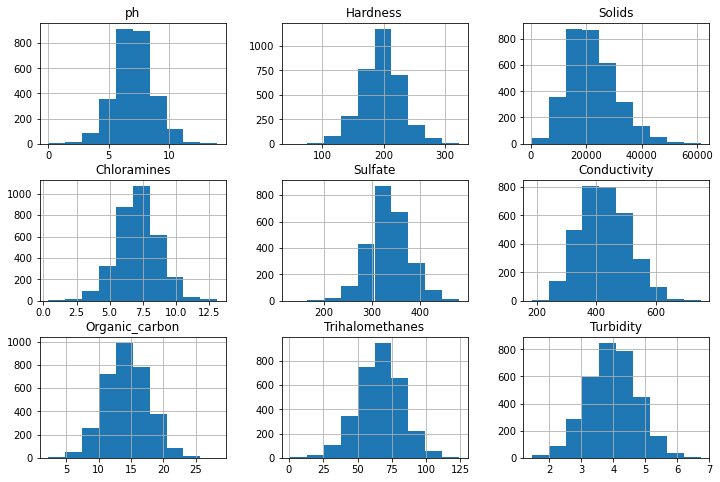

In [47]:
water_df.drop('Potability', axis=1).hist(figsize=(12,8))

In [48]:
water_df.drop(columns="Solids")

,ph,Hardness,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


<AxesSubplot:>

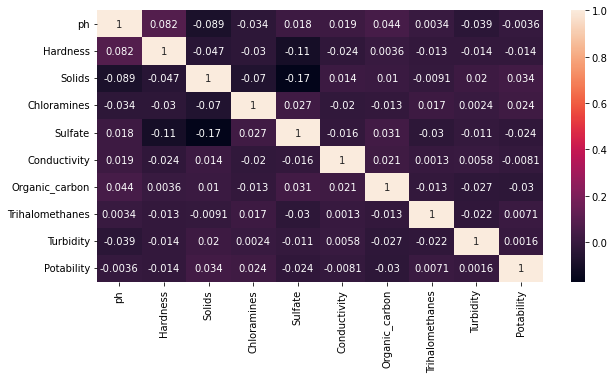

In [49]:
plt.figure(figsize = (10,5))
sns.heatmap(water_df.corr(), annot = True)

<AxesSubplot:>

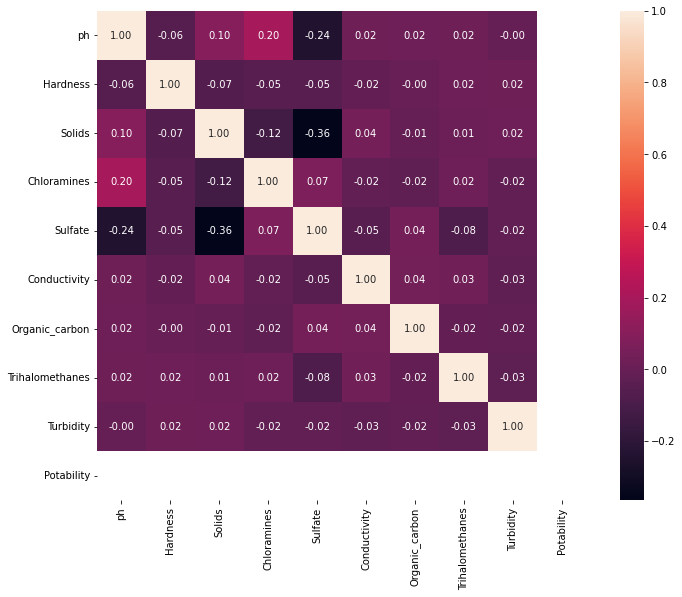

In [50]:
plt.figure(figsize = (12,9))
sns.heatmap(water_df[water_df['Potability']==1].corr(), annot=True, square=True, fmt='.2f')

<AxesSubplot:>

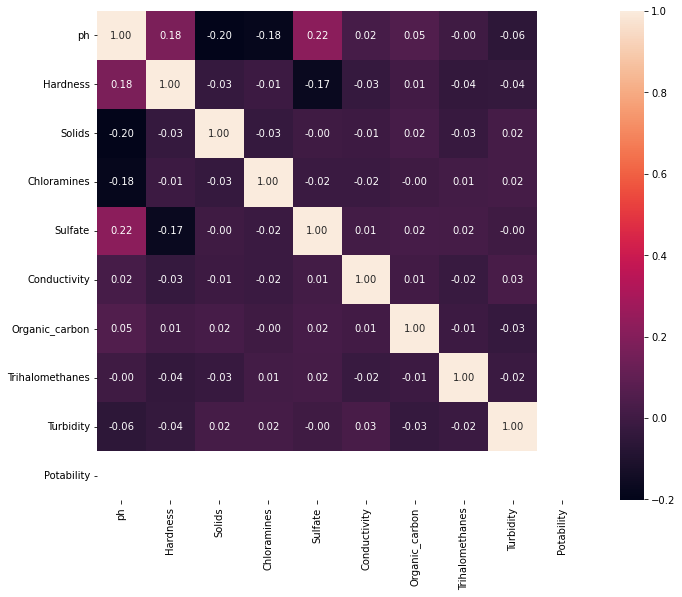

In [51]:
plt.figure(figsize = (12,9))
sns.heatmap(water_df[water_df['Potability']==0].corr(), annot=True, square=True, fmt='.2f')

<AxesSubplot:>

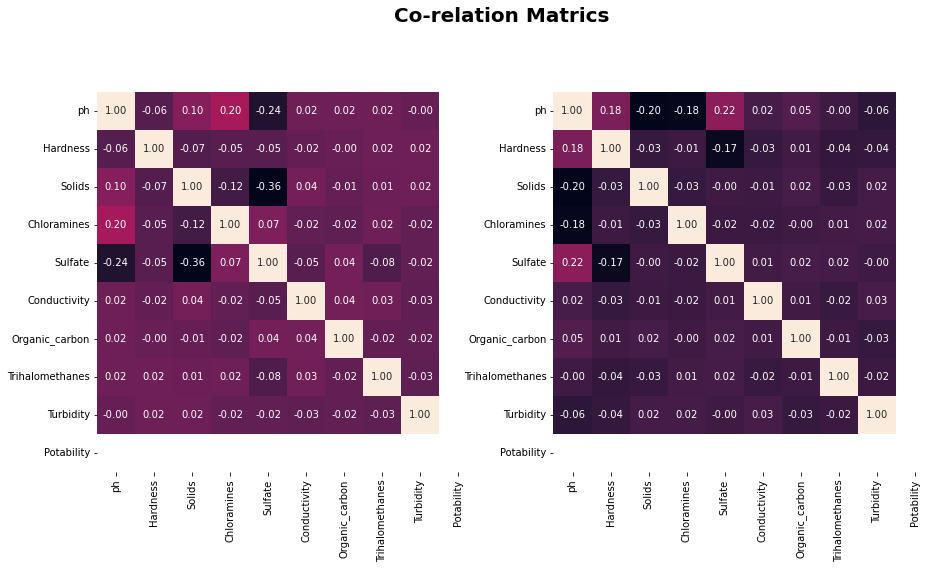

In [52]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(15,8))
plt.suptitle("Co-relation Matrics", size=20, weight='bold')
ax=ax.flatten()
sns.heatmap(water_df[water_df['Potability']==1].corr(), annot=True, square=True, fmt='.2f', ax=ax[0], cbar=False)
sns.heatmap(water_df[water_df['Potability']==0].corr(), annot=True, square=True, fmt='.2f', ax=ax[1], cbar=False)

In [62]:
int_cols = water_df.columns.drop('Potability')

In [63]:
from scipy.stats import ttest_ind
p_val=[]
for i in int_cols:
    pota_1 = water_df[water_df['Potability']==1][i]
    pota_0 = water_df[water_df['Potability']==0][i]
    stat, p_value=ttest_ind(pota_1, pota_0)
    p_val.append(np.round(p_value,3))
    if p_value <0.1:
        print(f"p_value for {i} is {p_value} is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis")
    else:
        print(f"p_value for {i} is {p_value} we accept the null hypothesis")

p_value for ph is nan we accept the null hypothesis
p_value for Hardness is 0.42854158740864623 we accept the null hypothesis
p_value for Solids is 0.053463638184504905 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Chloramines is 0.17361022465074671 we accept the null hypothesis
p_value for Sulfate is nan we accept the null hypothesis
p_value for Conductivity is 0.6418845485973537 we accept the null hypothesis
p_value for Organic_carbon is 0.08599746163873828 is less than significant value 0.1, so we have no enough evidance to prove Null Hypothesis. so we reject the Null Hypotesis
p_value for Trihalomethanes is nan we accept the null hypothesis
p_value for Turbidity is 0.9279391620838058 we accept the null hypothesis


The result show only variable Solid and Organic_carbon have significant difference between potable & non-potable water. 

Split the data before doing preprocessing data so there will be no information from test data that get leaked to training data.

In [64]:
from sklearn.model_selection import train_test_split

# Buat input & output
def split_input_output(data, target_column):
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

X, y = split_input_output(data = water_df,
                          target_column = "Potability")

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 123)

array([[<AxesSubplot:title={'center':'ph'}>,
        <AxesSubplot:title={'center':'Hardness'}>,
        <AxesSubplot:title={'center':'Solids'}>],
       [<AxesSubplot:title={'center':'Chloramines'}>,
        <AxesSubplot:title={'center':'Sulfate'}>,
        <AxesSubplot:title={'center':'Conductivity'}>],
       [<AxesSubplot:title={'center':'Organic_carbon'}>,
        <AxesSubplot:title={'center':'Trihalomethanes'}>,
        <AxesSubplot:title={'center':'Turbidity'}>]], dtype=object)

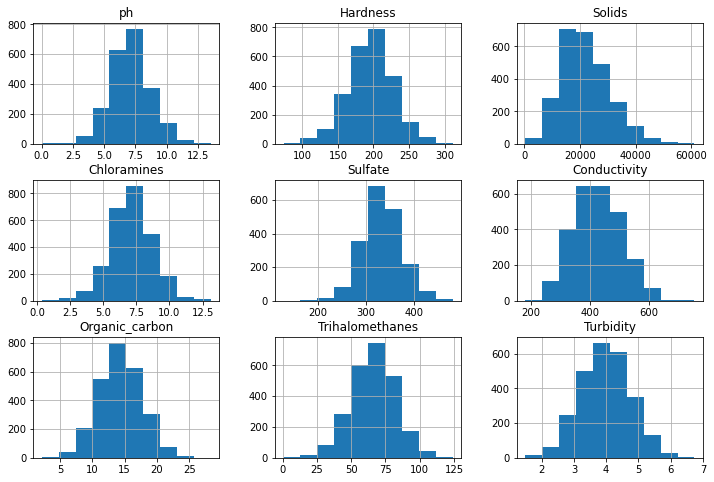

In [84]:
X_train.hist(figsize=(12,8))

In [65]:
# Buat imputer untuk jaga-jaga apabila di data test ada yang kosong
from sklearn.impute import SimpleImputer

def imputer(data, imputer = None):
    if imputer == None:
        # Buat imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [66]:
# Buat imputer untuk jaga-jaga apabila di data test ada yang kosong
from sklearn.impute import KNNImputer

def imputer(data, imputer = None):
    if imputer == None:
        # Buat imputer
        imputer = KNNImputer(missing_values = np.nan,
                   n_neighbors=3)
        imputer.fit(data)

    # Transform data dengan imputer
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data_imputed,
                                index = data.index,
                                columns = data.columns)
    
    return data_imputed, imputer

In [72]:
X_train_imputed, imputer_num = imputer(data = X_train)

In [73]:
imputer_num

KNNImputer(n_neighbors=3)

In [74]:
X_train_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2620 entries, 1318 to 2476
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2620 non-null   float64
 1   Hardness         2620 non-null   float64
 2   Solids           2620 non-null   float64
 3   Chloramines      2620 non-null   float64
 4   Sulfate          2620 non-null   float64
 5   Conductivity     2620 non-null   float64
 6   Organic_carbon   2620 non-null   float64
 7   Trihalomethanes  2620 non-null   float64
 8   Turbidity        2620 non-null   float64
dtypes: float64(9)
memory usage: 204.7 KB


In [75]:
X_train_imputed.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1318,6.724639,223.175415,41552.019664,7.744700,271.157120,463.885216,13.165035,61.058796,2.921415
1979,7.201702,147.711086,37308.994159,5.677451,279.164446,395.976824,13.326125,63.626894,3.883250
1239,6.810467,209.735559,32602.340084,7.422781,341.174269,340.030089,16.736749,42.349461,4.402340
946,5.924540,186.620068,44376.187382,6.614180,341.637774,273.446838,12.758115,59.456691,4.224343
1032,8.697122,166.452774,27752.000240,5.350924,372.264099,393.555796,13.748668,75.024545,4.180568
2969,5.726336,191.752290,35899.280309,8.066654,378.774605,307.987551,12.568721,60.192351,3.912289
120,6.877457,136.879214,27433.587294,7.091522,307.397088,342.196347,18.403846,81.193412,3.827650
1024,6.729580,242.164146,17975.553227,9.808651,322.235101,440.859435,13.571223,62.179477,4.003458
0,6.655223,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
462,8.926113,189.987947,15249.620244,7.076222,341.526873,361.901628,21.278095,59.528920,2.752134


In [76]:
X_train.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1318,6.724639,223.175415,41552.019664,7.744700,271.157120,463.885216,13.165035,61.058796,2.921415
1979,7.201702,147.711086,37308.994159,5.677451,279.164446,395.976824,13.326125,63.626894,3.883250
1239,6.810467,209.735559,32602.340084,7.422781,341.174269,340.030089,16.736749,42.349461,4.402340
946,5.924540,186.620068,44376.187382,6.614180,341.637774,273.446838,12.758115,59.456691,4.224343
1032,8.697122,166.452774,27752.000240,5.350924,372.264099,393.555796,13.748668,75.024545,4.180568
2969,5.726336,191.752290,35899.280309,8.066654,378.774605,307.987551,12.568721,60.192351,3.912289
120,6.877457,136.879214,27433.587294,7.091522,307.397088,342.196347,18.403846,81.193412,3.827650
1024,6.729580,242.164146,17975.553227,9.808651,322.235101,440.859435,13.571223,62.179477,4.003458
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
462,8.926113,189.987947,15249.620244,7.076222,341.526873,361.901628,21.278095,NaN,2.752134


### Scale data

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
def standardizeData(data, scaler = None):
    if scaler == None:
        # Buat & Fit scaler
        scaler = StandardScaler()
        scaler.fit(data)

    # Tranform data
    data_scaled = scaler.transform(data)
    data_scaled = pd.DataFrame(data_scaled,
                               index = data.index,
                               columns = data.columns)
    
    return data_scaled, scaler


In [79]:
X_train_clean, scaler = standardizeData(data = X_train_imputed)
X_train_clean.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1318,-0.249557,0.836794,2.223633,0.388450,-1.638000,0.473789,-0.355349,-0.320528,-1.344819
1979,0.067010,-1.498724,1.741746,-0.916769,-1.425770,-0.370563,-0.307049,-0.159810,-0.113956
1239,-0.192604,0.420849,1.207204,0.185197,0.217772,-1.066187,0.715565,-1.491406,0.550324
946,-0.780482,-0.294544,2.544378,-0.325337,0.230057,-1.894062,-0.477357,-0.420792,0.322541
1032,1.059334,-0.918694,0.656343,-1.122932,1.041793,-0.400665,-0.180357,0.553484,0.266522


# Transform X_test data

In [80]:
def transformTestData(data, imputer_num, scaler):
    
    # 1. Handling num
    data_imputed, _ = imputer(data = data,
                            imputer = imputer_num)
                            
    
    # 2. Scale data
    data_clean, _ = standardizeData(data = data_imputed,
                                    scaler = scaler)

    return data_clean


In [81]:
X_test.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3202,8.743959,197.749325,40843.616551,6.368862,310.677200,326.253326,12.503203,66.421884,4.118973
2474,4.964070,168.283365,17694.574833,9.725321,333.639511,353.069939,17.293732,67.252514,4.761701
1972,5.892413,139.362253,11006.048507,5.311990,339.327905,446.494394,10.567071,89.692883,3.311813
1937,6.281904,160.306685,17095.270070,6.730577,305.094000,424.446185,14.374967,41.279830,4.457730
1639,6.758852,218.153477,22540.775167,7.196435,304.680599,382.502700,18.838735,53.815435,3.639972
2035,5.763773,183.073629,22025.696606,8.952896,NaN,376.581389,10.547398,63.299757,3.253200
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,NaN,4.210327
1840,NaN,240.984187,11429.201199,5.515977,267.680826,323.157517,8.666283,88.679265,3.802427
2711,7.650683,239.490148,15326.925014,8.927896,373.436312,425.336352,17.883592,NaN,4.043711
903,8.285395,196.552068,19096.822369,7.357857,342.936881,388.941163,14.151473,73.187013,5.438488


In [82]:
X_test_clean = transformTestData(data = X_test,
                                 imputer_num = imputer_num,
                                 scaler = scaler)

X_test_clean.head(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
3202,1.090413,0.049891,2.143178,-0.480226,-0.590539,-1.237483,-0.553787,0.015108,0.187699
2474,-1.417826,-0.862040,-0.485894,1.638974,0.018067,-0.904054,0.882566,0.067091,1.010200
1972,-0.801801,-1.757109,-1.245520,-1.147513,0.168835,0.257557,-1.134302,1.471467,-0.845225
1937,-0.543345,-1.108907,-0.553958,-0.251847,-0.738519,-0.016584,0.007427,-1.558346,0.621207
1639,-0.226854,0.681372,0.064497,0.042287,-0.749476,-0.538096,1.345807,-0.773836,-0.425280
2035,-0.887164,-0.404301,0.005998,1.151281,-0.741143,-0.611720,-1.140200,-0.180283,-0.920232
3219,-0.453223,0.419824,1.135897,0.084583,-0.306810,-1.695083,-0.893837,0.102077,0.304605
1840,-0.204207,1.387951,-1.197462,-1.018720,-1.730138,-1.275975,-1.704219,1.408032,-0.217386
2711,0.364943,1.341713,-0.754792,1.135496,1.072862,-0.005516,1.059425,1.019450,0.091386
903,0.786122,0.012838,-0.326638,0.144205,0.264489,-0.458042,-0.059584,0.438487,1.876286
